In [ ]:
# Example Material Source: https://www.tensorflow.org/tutorials/images/cnn
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt
import math

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images = train_images.reshape(train_images.shape[0], 32, 32, 3)
test_images = test_images.reshape(test_images.shape[0], 32, 32, 3)

##one hot encoding
train_labels = np_utils.to_categorical(train_labels,10)
test_labels = np_utils.to_categorical(test_labels,10)

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
##train_images, test_images = preProcess(train_images), preProcess(test_images)
##train_images, test_images = contrastCurve(train_images), contrastCurve(test_images)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [8]:
## Transforming images to get a larger test set

data_augmentation = Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
    input_shape=(32,32,3)),
    layers.experimental.preprocessing.RandomRotation(0.05),
    layers.experimental.preprocessing.RandomZoom(0.05),
    layers.experimental.preprocessing.RandomContrast(0.05),
  ]
)

In [17]:

model = models.Sequential()
model.add(data_augmentation)

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = "same", input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = "same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = "same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = "same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = "same"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = "same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = "same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = "same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = "same"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(128, (1, 1), activation='relu', padding = "same"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (1, 1), activation='relu', padding = "same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = "same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))



In [18]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_48 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
batch_normalization_49 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 128)      

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=25, 
                    validation_data=(test_images, test_labels))

Epoch 1/25
1563/1563 [==============================] - 918s 586ms/step - loss: 1.9847 - accuracy: 0.2689 - val_loss: 1.7341 - val_accuracy: 0.4024
Epoch 2/25
1563/1563 [==============================] - 906s 580ms/step - loss: 1.4062 - accuracy: 0.4923 - val_loss: 1.2887 - val_accuracy: 0.5717
Epoch 3/25
1563/1563 [==============================] - 900s 576ms/step - loss: 1.1920 - accuracy: 0.5858 - val_loss: 1.3631 - val_accuracy: 0.5299
Epoch 4/25
1563/1563 [==============================] - 909s 582ms/step - loss: 1.0572 - accuracy: 0.6393 - val_loss: 0.9526 - val_accuracy: 0.6761
Epoch 5/25
1563/1563 [==============================] - 936s 599ms/step - loss: 0.9514 - accuracy: 0.6816 - val_loss: 0.8741 - val_accuracy: 0.7010
Epoch 6/25
1563/1563 [==============================] - 926s 593ms/step - loss: 0.8893 - accuracy: 0.7056 - val_loss: 0.9126 - val_accuracy: 0.7043
Epoch 7/25
1563/1563 [==============================] - 917s 587ms/step - loss: 0.8330 - accuracy: 0.7235 - val_

313/313 - 33s - loss: 0.7238 - accuracy: 0.7680


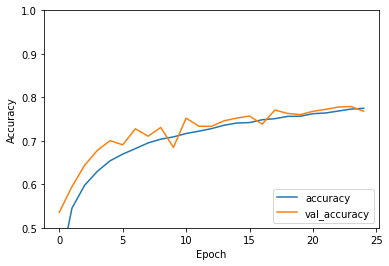

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7056999802589417
